Pierre Navaro - [Institut de Recherche Mathématique de Rennes](https://irmar.univ-rennes1.fr) - [CNRS](http://www.cnrs.fr/)

# References

- [Pandas website](http://pandas.pydata.org).
- *Python for Data Analysis* by Wes McKinney ([O'Reilly Media](http://shop.oreilly.com/product/0636920023784.do)).
- [Analyzing and Manipulating Data with Pandas Beginner](https://youtu.be/6ohWS7J1hVA) | SciPy 2016 Tutorial | Jonathan Rocher.


![pandas](http://pandas.pydata.org/_static/pandas_logo.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

https://pandas.pydata.org/

# Pandas 
```sh
conda install pandas
pip3 install pandas
```

```python
import pandas as pd
```

"*Pandas provides high-performance, easy-to-use data structures 
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.


In [1]:
%reset -f
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

# Object Creation: [Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

In [2]:
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
pd.Series(index=pd.period_range('09/11/2017', '09/18/2017', freq="D"))

2017-09-11   NaN
2017-09-12   NaN
2017-09-13   NaN
2017-09-14   NaN
2017-09-15   NaN
2017-09-16   NaN
2017-09-17   NaN
2017-09-18   NaN
Freq: D, dtype: float64

# Object Creation: [DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

In [4]:
dates = pd.date_range('20130101', periods=6)
pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

,A,B,C,D
2013-01-01,2.838036,-0.781269,-0.270570,1.448349
2013-01-02,-2.285158,0.907734,-2.084989,0.497039
2013-01-03,0.852400,0.494316,0.051306,0.303915
2013-01-04,-1.899995,0.855612,-0.893098,-0.051967
2013-01-05,-0.685050,1.151445,-1.644489,1.562185
2013-01-06,-1.199476,-1.220597,0.623471,-0.259078


In [5]:
pd.DataFrame({'A' : 1.,
              'B' : pd.Timestamp('20130102'),
              'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
              'D' : np.arange(4,dtype='int32'),
              'E' : pd.Categorical(["test","train","test","train"]),
              'F' : 'foo' })


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,0,test,foo
1,1.0,2013-01-02,1.0,1,train,foo
2,1.0,2013-01-02,1.0,2,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# [Load data](http://pandas.pydata.org/pandas-docs/stable/io.html)

We load data from [National Centers for Environmental Information](https://www.ncdc.noaa.gov/cag/time-series/global). This series is the mean of temperatures measured on the globe from 1901 to 2010.

In [6]:
filename = "https://www1.ncdc.noaa.gov/pub/data/anomalies/usingGHCNMv2/annual.land_ocean.90S.90N.df_1901-2000mean.dat"
#pd.read_table?
full_globe_temp = pd.read_table(filename)
full_globe_temp

,1880 -0.1373
0,1881 -0.0600
1,1882 -0.1130
2,1883 -0.1505
3,1884 -0.2323
...,...
127,2008 0.4842
128,2009 0.5588
129,2010 0.6147
130,2011 -999.0000


### Values are separated by spaces

In [7]:
full_globe_temp = pd.read_table(filename, sep="\s+")
full_globe_temp

,1880,-0.1373
0,1881,-0.0600
1,1882,-0.1130
2,1883,-0.1505
3,1884,-0.2323
...,...,...
127,2008,0.4842
128,2009,0.5588
129,2010,0.6147
130,2011,-999.0000


### Change the column name

In [8]:
full_globe_temp = pd.read_table(filename, sep="\s+", names=["year", "mean temp"])
full_globe_temp

,year,mean temp
0,1880,-0.1373
1,1881,-0.0600
2,1882,-0.1130
3,1883,-0.1505
...,...,...
128,2008,0.4842
129,2009,0.5588
130,2010,0.6147
131,2011,-999.0000


### Set index to the year of the record

In [9]:
full_globe_temp = pd.read_table(filename, sep="\s+", 
                                names=["year", "mean temp"], 
                                index_col=0)
full_globe_temp

,mean temp
year,
1880,-0.1373
1881,-0.0600
1882,-0.1130
1883,-0.1505
...,...
2008,0.4842
2009,0.5588
2010,0.6147
2011,-999.0000


Index is the most important attribute of a Series or DataFrame because it is used into the structures to access the information.


In [10]:
full_globe_temp.index

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
           dtype='int64', name='year', length=132)

### This table is a pandas DataFrame with only one column

In [11]:
type(full_globe_temp)

pandas.core.frame.DataFrame

### Create a Series from this DataFrame

In [12]:
full_globe_temp = full_globe_temp["mean temp"]
print(type(full_globe_temp))
print(full_globe_temp.dtype)
print(full_globe_temp.shape)
print(full_globe_temp.nbytes)

<class 'pandas.core.series.Series'>
float64
(132,)
1056


### NumPy arrays as backend of Pandas

In [13]:
type(full_globe_temp.values)

numpy.ndarray

In the dataset, -999.00 was used to indicate that there was no value for that year.

In [14]:
full_globe_temp[full_globe_temp.values == -999.00]

year
2011   -999.0
Name: mean temp, dtype: float64

### Setting missing values

Replace the missing value (-999.000) with what Pandas understand: np.nan

In [15]:
full_globe_temp[full_globe_temp == -999.000] = np.nan
full_globe_temp.tail()

year
2007    0.5510
2008    0.4842
2009    0.5588
2010    0.6147
2011       NaN
Name: mean temp, dtype: float64

### Removing missing values

Once they have been converted to np.nan, missing values can be removed (dropped).

In [16]:
full_globe_temp.dropna().tail() # NaN value is removed

year
2006    0.5623
2007    0.5510
2008    0.4842
2009    0.5588
2010    0.6147
Name: mean temp, dtype: float64

### Visualization

`.plot` generates a basic visualization using matplotlib.


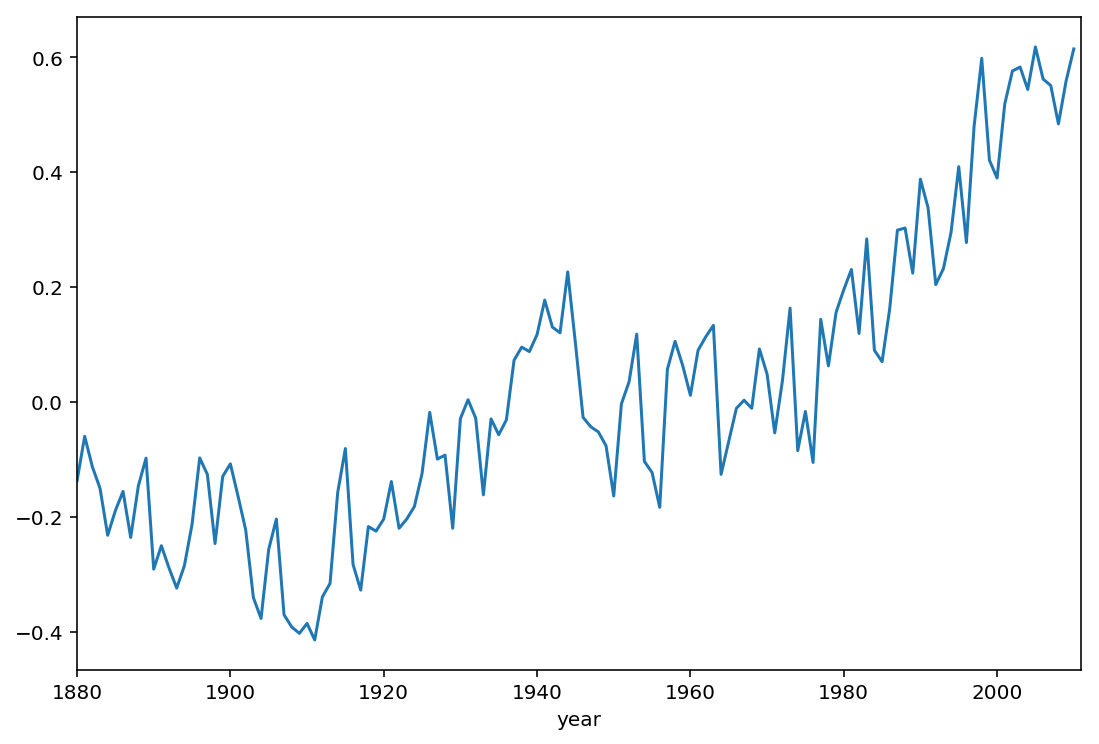

In [17]:
full_globe_temp.plot();

## Seaborn

[seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) plots data and a linear regression model fit  (plot was easier if we kept the DataFrame format).

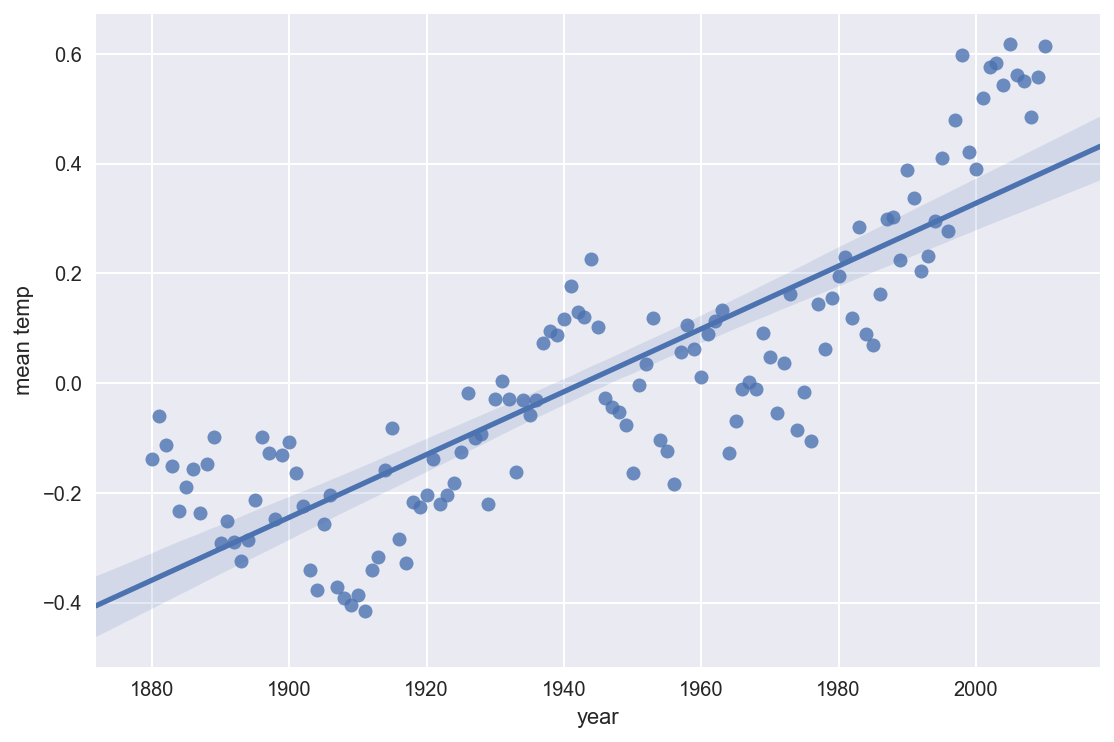

In [18]:
import seaborn as sns
sns.set()

sns.regplot(x=full_globe_temp.index.to_series(),
            y=full_globe_temp);


In [19]:
full_globe_temp[:-1].index

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='year', length=131)

# Load Data from CSV File

In [20]:
url = "https://www.fun-mooc.fr/c4x/agrocampusouest/40001S03/asset/AnaDo_JeuDonnees_TemperatFrance.csv"
french_cities = pd.read_csv(url, delimiter=";", encoding="latin1", index_col=0)
french_cities

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Viewing Data

In [21]:
french_cities.head()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


In [22]:
french_cities.tail()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,11.18,15.7,NE
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Index

In [23]:
french_cities.index

Index(['Bordeaux', 'Brest', 'Clermont', 'Grenoble', 'Lille', 'Lyon',
       'Marseille', 'Montpellier', 'Nantes', 'Nice', 'Paris', 'Rennes',
       'Strasbourg', 'Toulouse', 'Vichy'],
      dtype='object')

We can rename an index by setting its name.

In [24]:
french_cities.index.name = "City"
french_cities.head()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


# Exercice 
## Rename DataFrame Months in English

In [25]:
import locale
import calendar

locale.setlocale(locale.LC_ALL,'en_US')

months = calendar.month_abbr
print(*months)

 Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec


In [26]:
french_cities.rename(
  columns={ old : new 
           for old, new in zip(french_cities.columns[:12], months[1:])
          if old != new },
  inplace=True)
french_cities.columns

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Lati', 'Long', 'Moye', 'Ampl', 'Région'],
      dtype='object')

# From a local or remote HTML file
We can download and extract data about mean sea level stations around the world from the [PSMSL website](http://www.psmsl.org/).

In [27]:
# Needs `lxml`, `beautifulSoup4` and `html5lib` python packages
table_list = pd.read_html("http://www.psmsl.org/data/obtaining/")

In [28]:
# there is 1 table on that page which contains metadata about the stations where 
# sea levels are recorded
local_sea_level_stations = table_list[0]
local_sea_level_stations

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,HELIGMAN,231,60.200,19.300,NaN,ALA,01/01/1980,60,251
1,KOBBAKLINTAR,63,60.033,19.883,NaN,ALA,01/01/1980,60,261
2,LEMSTROM,84,60.100,20.017,NaN,ALA,01/01/1980,60,271
3,FOGLO / DEGERBY,249,60.032,20.385,NaN,ALA,24/01/2017,60,281
...,...,...,...,...,...,...,...,...,...
1502,"LIME TREE BAY, ST CROIX",1447,17.693,-64.753,NaN,VIR,02/02/2017,939,11
1503,CHRISTIANSTED HARBOUR,2118,17.750,-64.705,NaN,VIR,02/02/2017,939,15
1504,LAMESHUR BAY,2119,18.317,-64.723,NaN,VIR,02/02/2017,939,21
1505,ADEN,44,12.788,44.974,3.0,YEM,01/02/2016,485,1


# Indexing on Series
- By default [] on a series accesses values using the index, not the location in the series.

In [29]:
first_date = full_globe_temp.index[0]
first_date == 1880,  full_globe_temp[1880]

(True, -0.13730000000000001)

- This kind of indexing is sometimes ambiguous
- Pandas provides another more explicit way to do the same thing with `loc` and `iloc`.

In [30]:
print(full_globe_temp[1880], full_globe_temp[2011])
print(full_globe_temp.loc[1880], full_globe_temp.loc[2011])
print(full_globe_temp.iloc[0], full_globe_temp.iloc[-1])

-0.1373 nan
-0.1373 nan
-0.1373 nan


In [31]:
full_globe_temp.index[-1] # Year of the last record

2011

In [32]:
full_globe_temp[2011] = np.nan # New records can be added:
full_globe_temp.iloc[-1]

nan

# Indexing on DataFrames

In [33]:
french_cities['Lati']  # DF [] accesses columns (Series)

City
Bordeaux      44.50
Brest         48.24
Clermont      45.47
Grenoble      45.10
              ...  
Rennes        48.05
Strasbourg    48.35
Toulouse      43.36
Vichy         46.08
Name: Lati, Length: 15, dtype: float64

`.loc` and `.iloc` allow to access individual values, slices or masked selections:

In [34]:
french_cities.loc['Rennes', "Sep"]

15.699999999999999

In [35]:
french_cities.loc['Rennes', ["Sep", "Dec"]]

Sep    15.7
Dec     5.4
Name: Rennes, dtype: object

In [36]:
french_cities.loc['Rennes', "Sep":"Dec"]

Sep    15.7
Oct    11.6
Nov     7.8
Dec     5.4
Name: Rennes, dtype: object

# Masking

In [37]:
mask = [True, False] * 6
print(french_cities.iloc[0, mask])
print(french_cities.loc["Rennes", mask])

Jan     5.6
Mar    10.3
May    15.8
Jul    20.9
Sep    18.6
Nov     9.1
Name: Bordeaux, dtype: object
Jan     4.8
Mar     7.9
May    13.1
Jul    17.9
Sep    15.7
Nov     7.8
Name: Rennes, dtype: object


# New column


In [38]:
french_cities["std"] = french_cities.iloc[:,:12].std(axis=1)
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région,std
City,,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO,5.792681
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO,3.773673
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE,6.189795
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE,6.770771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO,4.958800
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE,6.931723
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO,6.056977
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE,6.201148


In [39]:
french_cities = french_cities.drop("std", axis=1) # remove this new column

In [40]:
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Modifying a dataframe with multiple indexing

In [41]:
# french_cities['Rennes']['Sep'] = 25 # It does not works and breaks the DataFrame
french_cities.loc['Rennes']['Sep'] # = 25 is the right way to do it

15.699999999999999

In [42]:
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Working with dates and times

Index dtype is NumPy's new 'int64Index':

In [43]:
full_globe_temp.index.dtype

dtype('int64')

Use Real datetime index and add a flag to signal if the value is before or after the great depression's black Friday:

In [44]:
black_friday = pd.to_datetime('1929-10-29')
full_globe_temp.index  = pd.to_datetime(full_globe_temp.index,format='%Y')
full_globe_temp.index > black_friday

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Timestamps to periods
Convert its index from timestamp to period is more meaningfull since it was measured and averaged over the year...


In [45]:
full_globe_temp.index = full_globe_temp.index.to_period()
full_globe_temp

year
1880   -0.1373
1881   -0.0600
1882   -0.1130
1883   -0.1505
         ...  
2008    0.4842
2009    0.5588
2010    0.6147
2011       NaN
Freq: A-DEC, Name: mean temp, Length: 132, dtype: float64

In [46]:
full_globe_temp.index.dtype

period[A-DEC]

## Resampling

Series can be resample, downsample or upsample.
- Frequencies can be specified as strings: "us", "ms", "S", "T", "H", "D", "B", "W", "M", "A", "3min", "2h20", ...
- More aliases at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

### Series converted to 10 year blocks:

In [47]:
full_globe_temp.resample("10A").mean()

year
1880-12-31   -0.13730
1890-12-31   -0.16727
1900-12-31   -0.20713
1910-12-31   -0.31178
               ...   
1990-12-31    0.21704
2000-12-31    0.36462
2010-12-31    0.56116
2020-12-31        NaN
Freq: 10A-DEC, Name: mean temp, Length: 15, dtype: float64

### Upscale to a monthly series

In [48]:
full_globe_temp.resample("M").mean()

year
1880-01   -0.1373
1880-02       NaN
1880-03       NaN
1880-04       NaN
            ...  
2011-09       NaN
2011-10       NaN
2011-11       NaN
2011-12       NaN
Freq: M, Name: mean temp, Length: 1584, dtype: float64

# Transforming datasets

In [49]:
french_cities['Moye'].min(), french_cities['Ampl'].max()

(9.7200000000000006, 18.600000000000001)

## Apply

Let's convert the temperature mean from Celsius to Fahrenheit degree.

In [50]:
fahrenheit = lambda T: T*9/5+32
french_cities['Moye'].apply(fahrenheit)

City
Bordeaux      55.994
Brest         51.386
Clermont      51.692
Grenoble      51.764
               ...  
Rennes        52.034
Strasbourg    49.496
Toulouse      54.824
Vichy         51.296
Name: Moye, Length: 15, dtype: float64

## Sort

In [51]:
french_cities.sort_values(by='Lati')

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région
City,,,,,,,,,,,,,,,,,
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,11.18,15.7,NE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


In [52]:
french_cities = french_cities.sort_values(by='Lati',ascending=False)
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Moye,Ampl,Région
City,,,,,,,,,,,,,,,,,
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,11.18,15.7,NE
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE


## Stack and unstack

Instead of seeing the months along the axis 1, and the cities along the axis 0, let's try to convert these into an outer and an inner axis along only 1 time dimension.

In [53]:
pd.set_option("display.max_rows", 20)
unstacked = french_cities.iloc[:,:12].unstack()
unstacked

     City       
Jan  Lille          2.4
     Paris          3.4
     Strasbourg     0.4
     Brest          6.1
     Rennes         4.8
     Nantes         5.0
     Vichy          2.4
     Clermont       2.6
     Lyon           2.1
     Grenoble       1.5
                   ... 
Dec  Nantes         5.5
     Vichy          3.4
     Clermont       3.6
     Lyon           3.1
     Grenoble       2.3
     Bordeaux       6.2
     Nice           8.2
     Montpellier    6.5
     Toulouse       5.5
     Marseille      6.9
Length: 180, dtype: float64

In [54]:
type(unstacked)

pandas.core.series.Series

## Transpose

The result is grouped in the wrong order since it sorts first the axis that was unstacked. We need to transpose the dataframe.

In [55]:
city_temp = french_cities.iloc[:,:12].transpose()
city_temp

City,Lille,Paris,Strasbourg,Brest,Rennes,Nantes,Vichy,Clermont,Lyon,Grenoble,Bordeaux,Nice,Montpellier,Toulouse,Marseille
Jan,2.4,3.4,0.4,6.1,4.8,5.0,2.4,2.6,2.1,1.5,5.6,7.5,5.6,4.7,5.5
Feb,2.9,4.1,1.5,5.8,5.3,5.3,3.4,3.7,3.3,3.2,6.6,8.5,6.7,5.6,6.6
Mar,6.0,7.6,5.6,7.8,7.9,8.4,7.1,7.5,7.7,7.7,10.3,10.8,9.9,9.2,10.0
Apr,8.9,10.7,9.8,9.2,10.1,10.8,9.9,10.3,10.9,10.6,12.8,13.3,12.8,11.6,13.0
May,12.4,14.3,14.0,11.6,13.1,13.9,13.6,13.8,14.9,14.5,15.8,16.7,16.2,14.9,16.8
Jun,15.3,17.5,17.2,14.4,16.2,17.2,17.1,17.3,18.5,17.8,19.3,20.1,20.1,18.7,20.8
Jul,17.1,19.1,19.0,15.6,17.9,18.8,19.3,19.4,20.7,20.1,20.9,22.7,22.7,20.9,23.3
Aug,17.1,18.7,18.3,16.0,17.8,18.6,18.8,19.1,20.1,19.5,21.0,22.5,22.3,20.9,22.8
Sep,14.7,16.0,15.1,14.7,15.7,16.4,16.0,16.2,16.9,16.7,18.6,20.3,19.3,18.3,19.9
Oct,10.4,11.4,9.5,12.0,11.6,12.2,11.0,11.2,11.4,11.4,13.8,16.0,14.6,13.3,15.0


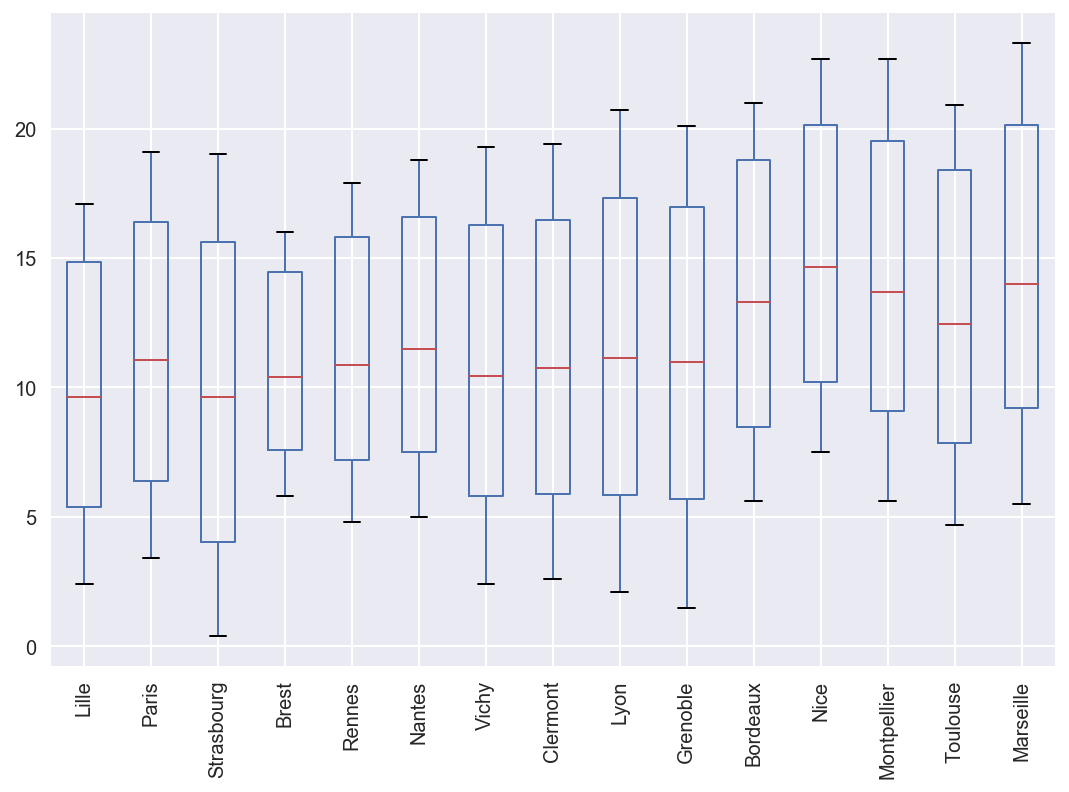

In [56]:
city_temp.boxplot(rot=90);

# Describing

In [57]:
french_cities['Région'].describe()

count     15
unique     4
top       SE
freq       7
Name: Région, dtype: object

In [58]:
french_cities['Région'].unique()

array(['NE', 'NO', 'SE', 'SO'], dtype=object)

In [59]:
french_cities['Région'].value_counts()

SE    7
NO    3
NE    3
SO    2
Name: Région, dtype: int64

In [60]:
# To save memory, we can convert it to a categorical column:
french_cities["Région"] = french_cities["Région"].astype("category")

In [61]:
french_cities.memory_usage()

Index     760
Jan       120
Feb       120
Mar       120
Apr       120
May       120
Jun       120
Jul       120
Aug       120
Sep       120
Oct       120
Nov       120
Dec       120
Lati      120
Long      120
Moye      120
Ampl      120
Région    207
dtype: int64

# Data Aggregation/summarization

## groupby

In [62]:
fc_grouped_region = french_cities.groupby("Région")
type(fc_grouped_region)

pandas.core.groupby.DataFrameGroupBy

In [63]:
for group_name, subdf in fc_grouped_region:
    print(group_name)
    print(subdf)
    print("")

NE
            Jan  Feb  Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  Nov  Dec  \
City                                                                            
Lille       2.4  2.9  6.0   8.9  12.4  15.3  17.1  17.1  14.7  10.4  6.1  3.5   
Paris       3.4  4.1  7.6  10.7  14.3  17.5  19.1  18.7  16.0  11.4  7.1  4.3   
Strasbourg  0.4  1.5  5.6   9.8  14.0  17.2  19.0  18.3  15.1   9.5  4.9  1.3   

             Lati  Long   Moye  Ampl Région  
City                                         
Lille       50.38  3.04   9.73  14.7     NE  
Paris       48.52  2.20  11.18  15.7     NE  
Strasbourg  48.35  7.45   9.72  18.6     NE  

NO
        Jan  Feb  Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  Nov  Dec  \
City                                                                        
Brest   6.1  5.8  7.8   9.2  11.6  14.4  15.6  16.0  14.7  12.0  9.0  7.0   
Rennes  4.8  5.3  7.9  10.1  13.1  16.2  17.9  17.8  15.7  11.6  7.8  5.4   
Nantes  5.0  5.3  8.4  10.8  13.9  17.2  18.8  18

## Transferring R data sets into Python

In [64]:
%load_ext rpy2.ipython

- conversions of R to pandas objects will be done automatically

In [65]:
from rpy2.robjects import r, pandas2ri

pandas2ri.activate()
r.library('missMDA')
r.data('orange')
orange = r('orange')

In [66]:
orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
1,4.791667,5.291667,NaN,NaN,NaN,2.833333,NaN,5.208333
2,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
3,4.708333,5.333333,NaN,NaN,4.291667,3.166667,6.250000,5.166667
4,6.583333,6.000000,7.416667,4.166667,6.750000,NaN,1.416667,3.416667
5,NaN,6.166667,5.333333,4.083333,NaN,4.375000,3.416667,4.416667
6,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
7,4.291667,4.916667,5.291667,5.541667,5.250000,NaN,1.291667,4.333333
8,NaN,4.541667,4.833333,NaN,4.958333,2.916667,1.541667,3.958333
9,4.416667,NaN,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
10,4.541667,4.291667,NaN,5.791667,4.375000,NaN,NaN,5.000000


In [67]:
%%R

library('missMDA')
data(orange)
estim_ncpPCA(orange)

$ncp
[1] 2

$criterion
        0         1         2         3         4         5 
1.0388714 0.9279948 0.5976727 0.7855501 2.0250470 2.6741735 



In [68]:
from rpy2.robjects.packages import importr

miss_mda = importr('missMDA')
res = miss_mda.imputePCA(orange,ncp=2)
type(res), [type(elt) for elt in res]

(rpy2.robjects.vectors.ListVector,
 [rpy2.robjects.vectors.Matrix, rpy2.robjects.vectors.Matrix])

In [69]:
print(res[0])

   Color.intensity Odor.intensity Attack.intensity    Sweet     Acid   Bitter
1         4.791667       5.291667         4.077034 5.527352 4.177564 2.833333
2         4.583333       6.041667         4.416667 5.458333 4.125000 3.541667
3         4.708333       5.333333         4.158054 5.442936 4.291667 3.166667
4         6.583333       6.000000         7.416667 4.166667 6.750000 4.702509
5         6.271605       6.166667         5.333333 4.083333 5.455805 4.375000
6         6.333333       5.000000         5.375000 5.000000 5.500000 3.625000
7         4.291667       4.916667         5.291667 5.541667 5.250000 3.214232
8         4.460613       4.541667         4.833333 5.479128 4.958333 2.916667
9         4.416667       5.136550         5.166667 4.625000 5.041667 3.666667
10        4.541667       4.291667         4.176991 5.791667 4.375000 2.735255
11        4.083333       5.125000         3.916667 5.703297 3.900164 2.815857
12        6.500000       5.875000         6.125000 4.875000 5.29

In [70]:
orange = pandas2ri.ri2py_dataframe(res[0])
orange.columns = res[0].colnames
orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
0,4.791667,5.291667,4.077034,5.527352,4.177564,2.833333,5.711715,5.208333
1,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
2,4.708333,5.333333,4.158054,5.442936,4.291667,3.166667,6.250000,5.166667
3,6.583333,6.000000,7.416667,4.166667,6.750000,4.702509,1.416667,3.416667
4,6.271605,6.166667,5.333333,4.083333,5.455805,4.375000,3.416667,4.416667
5,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
6,4.291667,4.916667,5.291667,5.541667,5.250000,3.214232,1.291667,4.333333
7,4.460613,4.541667,4.833333,5.479128,4.958333,2.916667,1.541667,3.958333
8,4.416667,5.136550,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
9,4.541667,4.291667,4.176991,5.791667,4.375000,2.735255,4.026062,5.000000


In [71]:
r('library(missMDA)')
r('df <- imputePCA(orange,ncp=2) ')
r('res <- as.data.frame(df$completeObs)')
orange = r('res')
orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
1,4.791667,5.291667,4.077034,5.527352,4.177564,2.833333,5.711715,5.208333
2,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
3,4.708333,5.333333,4.158054,5.442936,4.291667,3.166667,6.250000,5.166667
4,6.583333,6.000000,7.416667,4.166667,6.750000,4.702509,1.416667,3.416667
5,6.271605,6.166667,5.333333,4.083333,5.455805,4.375000,3.416667,4.416667
6,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
7,4.291667,4.916667,5.291667,5.541667,5.250000,3.214232,1.291667,4.333333
8,4.460613,4.541667,4.833333,5.479128,4.958333,2.916667,1.541667,3.958333
9,4.416667,5.136550,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
10,4.541667,4.291667,4.176991,5.791667,4.375000,2.735255,4.026062,5.000000


In [72]:
import toyplot # https://toyplot.readthedocs.io/
canvas = toyplot.Canvas(width=640, height=480)
rolled_series = full_globe_temp.rolling(window=10, center=True)
axes = canvas.cartesian(xlabel="Year", ylabel=u"Temperature \u00b0F")
axes.plot(full_globe_temp.values, color="red", stroke_width=1)
axes.plot(rolled_series.mean(), color="blue", stroke_width=2)

<path d="M 50.0 306.74297978894646 L 53.599999999999994 280.47397603291 L 57.200000000000003 298.48506528349128 L 60.799999999999997 311.22876050795918 L 64.400000000000006 339.0270076909319 L 68.0 324.44822035414063 L 71.599999999999994 313.0638526202826 L 75.200000000000003 340.31836880701127 L 78.800000000000011 309.76748345555359 L 82.400000000000006 293.38758719370418 L 86.0 359.07708817742804 L 89.599999999999994 345.21194777320687 L 93.200000000000003 358.43140761938827 L 96.799999999999997 370.29153997495973 L 100.40000000000001 357.07208012877834 L 104.0 332.63816848506531 L 107.59999999999999 293.21767125737796 L 111.19999999999999 303.00482918976928 L 114.8 343.92058665712756 L 118.40000000000001 304.19424074405288 L 122.0 296.75192273296364 L 125.60000000000001 315.88445716329812 L 129.19999999999999 335.86657127526382 L 132.79999999999998 375.89876587372561 L 136.40000000000001 388.26864603827579 L 140.0 347.35288857091751 L 143.59999999999999 329.44374888213201 L 147.19999999999999 386.09372205329993 L 150.80000000000001 393.29815775353245 L 154.39999999999998 397.07029153997496 L 158.0 391.19120014308709 L 161.59999999999999 400.97835807547841 L 165.19999999999999 375.52495081380789 L 168.80000000000001 367.53890180647466 L 172.39999999999998 313.67554999105704 L 176.0 287.67841173314253 L 179.59999999999999 356.29046682167768 L 183.19999999999999 371.48095152924338 L 186.80000000000001 333.86156322661418 L 190.40000000000001 336.58021820783404 L 194.0 329.44374888213201 L 197.59999999999999 307.21874441065995 L 201.20000000000002 334.88105884457156 L 204.80000000000001 329.44374888213201 L 208.40000000000001 322.03541405830799 L 212.0 302.49508138079057 L 215.59999999999997 266.26900375603651 L 219.20000000000002 293.93131818994817 L 222.80000000000001 291.58647826864603 L 226.39999999999998 334.84707565730633 L 230.0 270.00715435521369 L 233.60000000000002 258.79270255768199 L 237.19999999999999 269.73528885709175 L 240.80000000000001 315.10284385619741 L 244.40000000000001 270.14308710427468 L 247.99999999999997 279.52244678948313 L 251.60000000000002 270.7208012877839 L 255.19999999999999 235.4122697191915 L 258.80000000000001 227.66410302271501 L 262.39999999999998 230.31479162940437 L 266.0 220.25576819889108 L 269.60000000000002 199.83187265247719 L 273.19999999999999 215.83795385440882 L 276.80000000000001 219.20228939366837 L 280.40000000000003 183.14612770524056 L 284.0 225.14934716508671 L 287.60000000000002 269.22554104811297 L 291.19999999999999 274.76480057234841 L 294.79999999999995 277.8912538007512 L 298.40000000000003 286.08120193167588 L 302.0 315.7825076015024 L 305.59999999999997 261.27347522804502 L 309.19999999999999 248.22393131818993 L 312.80000000000001 219.98390270076905 L 316.39999999999998 295.32462886782326 L 320.0 301.88338401001607 L 323.60000000000002 322.47719549275621 L 327.19999999999999 240.74763011983541 L 330.80000000000001 224.23180110892503 L 334.39999999999998 238.64067250939007 L 338.0 256.17599713825791 L 341.60000000000002 229.53317832230368 L 345.19999999999999 221.58111250223573 L 348.80000000000001 214.81845823645142 L 352.40000000000003 303.00482918976928 L 356.0 283.5324628867823 L 359.60000000000002 263.89018064746915 L 363.19999999999999 259.09855124306921 L 366.80000000000001 263.89018064746915 L 370.40000000000003 228.75156501520297 L 374.0 243.6022178501162 L 377.60000000000002 278.4349847969952 L 381.19999999999993 247.71418350921124 L 384.80000000000001 204.58951886961185 L 388.40000000000003 288.93578966195668 L 391.99999999999994 265.75925594705774 L 395.60000000000002 295.93632623859776 L 399.19999999999999 211.21624038633516 L 402.79999999999995 238.74262207118582 L 406.40000000000003 207.07029153997493 L 410.0 193.74888213199779 L 413.59999999999997 181.7188338401001 L 417.20000000000005 219.57610445358608 L 420.80000000000001 163.60579502772308 L 424.39999999999998 229.53317832230368 L 428.0 236.29583258808793 L 431.60000000000002 204.75943480593807 

# matplotlib
```bash
pip3 install adjusttext
```

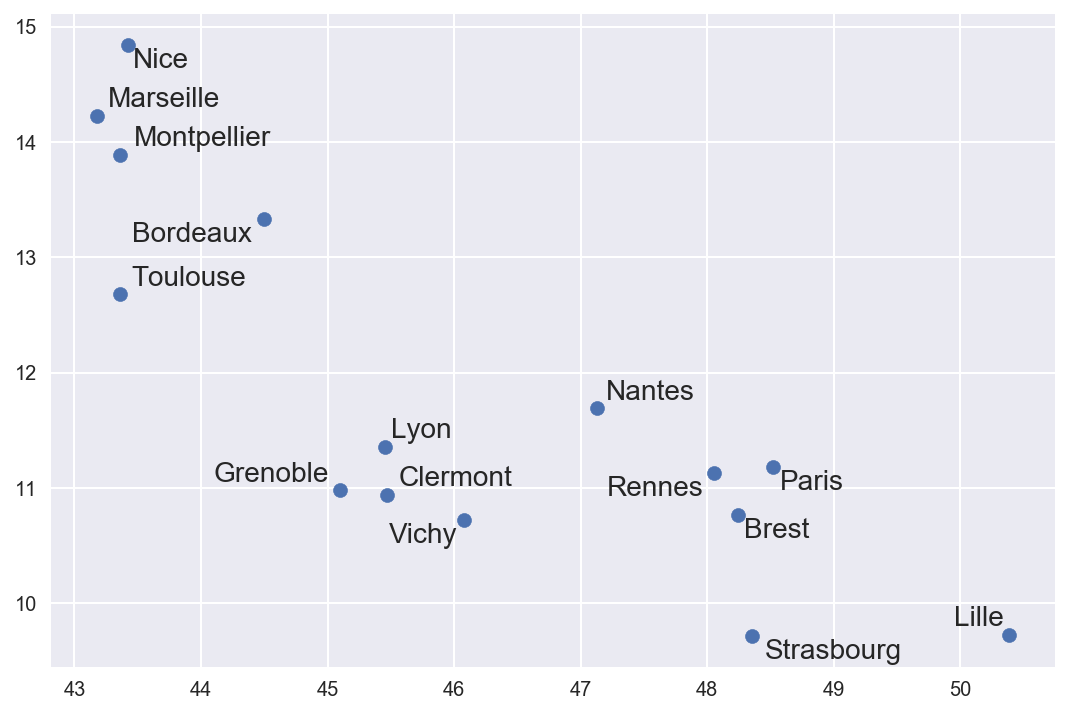

In [73]:
from adjustText import adjust_text

x, y = french_cities['Lati'],french_cities["Moye"]
labels = french_cities.index
plt.scatter(x, y)
texts = []
for x0, y0, s0 in zip(x,y,labels):
    texts.append(plt.text(x0, y0, s0, size=14))
adjust_text(texts, x, y);

In [74]:
french_cities.columns

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Lati', 'Long', 'Moye', 'Ampl', 'Région'],
      dtype='object')

# Altair

https://altair-viz.github.io/

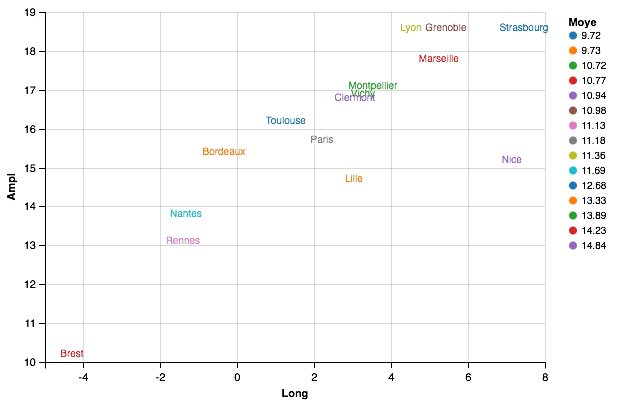

In [75]:
from altair import Chart, Y, Scale, Formula

french_cities['City'] = french_cities.index

Chart(french_cities).mark_text().encode(
    color='Moye:N',
    y=Y('Ampl:Q',scale=Scale(zero=False)),
    text='City:N',
    x='Long:Q')

# Bokeh

http://bokeh.pydata.org/

```sh
conda install bokeh selenium PhantomJS
```
or
```sh
sudo -H pip3 install selenium
brew install node
npm install -g phantomjs-prebuilt
```

In [76]:
from bokeh.plotting import figure, output_notebook, show, reset_output
from bokeh.io import export_png
reset_output()
output_notebook()

Loading BokehJS ...

In [80]:
from collections import OrderedDict
from math import log, sqrt

import numpy as np
import pandas as pd

city_color = OrderedDict([
    ("Lille",        "black"),
    ("Paris",        "darkblue"),
    ("Strasbourg",   "blue"),
    ("Brest",        "grey"),
    ("Rennes",       "red"),
    ("Nantes",       "yellow"),
    ("Vichy",        "lightcyan"),
    ("Clermont",     "green"),
    ("Lyon",         "darkred"),
    ("Grenoble",     "pink"),
    ("Bordeaux",     "navyblue"),
    ("Nice",         "darkred"),
    ("Montpellier",  "orange"),
    ("Toulouse",     "purple"),
    ("Marseille",    "lightblue"  ),
])

temp_color = OrderedDict([
    ("Moye", "#0d3362"),
    ("Ampl", "#c64737"),
])

region_color = {
    "NO" : "#b3ecff",
    "NE" : "#ccf2ff",
    "SO" : "#80dfff",
    "SE" : "#99e6ff",
}

df = french_cities.sort_values(by='Région')

width = 800
height = 800
inner_radius = 90
outer_radius = 300 - 10

minr = 0
maxr = 30
a = (outer_radius - inner_radius) / (maxr - minr)
b = inner_radius 

def rad(t):
    return a * t + b

big_angle = 2.0 * np.pi / (len(df) + 1)
small_angle = big_angle / 7

p = figure(plot_width=width, plot_height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=(-420, 420), y_range=(-420, 420),
    min_border=0, outline_line_color="black",
    background_fill_color="navajowhite", border_fill_color="#f0e1d2",
    toolbar_sticky=False)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# annular wedges
angles = np.pi/2 - big_angle/2 - pd.RangeIndex(0,16).to_series()*big_angle
colors = [region_color[region] for region in df.Région]
p.annular_wedge(0, 0, inner_radius, outer_radius, -big_angle+angles[:-1], angles[:-1], color=colors,
)

# small wedges
p.annular_wedge(0, 0, inner_radius, rad(df.Moye),
                -big_angle+angles[:-1]+5*small_angle, -big_angle+angles[:-1]+6*small_angle,
                color=temp_color['Moye'])
p.annular_wedge(0, 0, inner_radius, rad(df.Ampl),
                -big_angle+angles[:-1]+3*small_angle, -big_angle+angles[:-1]+4*small_angle,
                color=temp_color['Ampl'])

# circular axes and labels
labels = np.arange(0, maxr, 5)
radii  = inner_radius + labels*a
p.circle(0, 0, radius=radii, fill_color=None, line_color="white")
p.text(0, radii[:-1], [str(r) for r in labels[:-1]],
       text_font_size="8pt", text_align="center", text_baseline="middle")
# radial axes
p.annular_wedge(0, 0, inner_radius-10, outer_radius+10,
                -big_angle+angles, -big_angle+angles, color="black")

# city names
xr = radii[-1]*np.cos(np.array(-big_angle/2 + angles[:-1]))
yr = radii[-1]*np.sin(np.array(-big_angle/2 + angles[:-1]))
label_angle=np.array(-big_angle/2+angles[:-1])
label_angle[label_angle < -np.pi/2] += np.pi # easier to read labels on the left side
p.text(xr, yr, df.City, angle=label_angle,
       text_font_size="9pt", text_align="center", text_baseline="middle")

p.circle(np.linspace(-340,340,4), 4*[-380], color=list(region_color.values()), radius=5)
p.text(np.linspace(-340,340,4), 4*[-380], text=["  Region-" + gr for gr in region_color.keys()],
       text_font_size="9pt", text_align="left", text_baseline="top")

p.rect([-40, -40], [18, -18], width=30, height=13,
       color=list(temp_color.values()))
p.text([-15, -15], [18, -18], text=list(temp_color),
       text_font_size="9pt", text_align="left", text_baseline="middle")

export_png(p, filename="bokeh_example.png")

'/Users/navaro/notebooks-python/bokeh_example.png'

![Bokeh example](bokeh_example.png)

# Saving Work

Excel Writer does not work with Series.

In [78]:
with pd.ExcelWriter("data/test.xls") as writer:
    pd.DataFrame({"Full Globe Temp": full_globe_temp}).to_excel(writer, sheet_name="FullGlobe temp data")

FileNotFoundError: [Errno 2] No such file or directory: 'data/test.xls'

[HDF5](https://support.hdfgroup.org/HDF5/) is widely used and one of the most powerful file format to store binary data. It allows to store both Series and DataFrames.

In [ ]:
with pd.HDFStore("data/pandas_nb.h5") as writer:
    full_globe_temp.to_hdf(writer, "/temperatures/full_globe")
    local_sea_level_stations.to_hdf(writer, "/sea_level/stations")

In [ ]:
%ls data